<a href="https://colab.research.google.com/github/thendralbala/ML_from_scratch/blob/main/2_Constructing_a_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Building a Simple Classifier

Classification is a type of supervised learning where the goal is to predict the categorical class label of a data point. In simpler terms, it's about assigning data points to predefined categories or groups.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

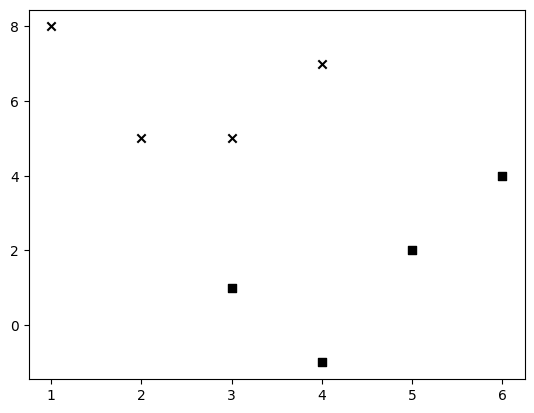

In [ ]:
X = np.array([[3,1], [2,5], [1,8], [6,4], [5,2], [3,5], [4,7], [4,-1]])

y = [0, 1, 1, 0, 0, 1, 1, 0]

class_0 = np.array([X[i] for i in range(len(X)) if y[i] == 0])
class_1 = np.array([X[i] for i in range(len(X)) if y[i] == 1])

plt.figure()
plt.scatter(class_0[:,0], class_0[:,1], color = 'black', marker = 's')
plt.scatter(class_1[:,0], class_1[:,1], color = 'black', marker = 'x')



From observation, we can conclude that the line x = y acts as a classifier in this scenario.

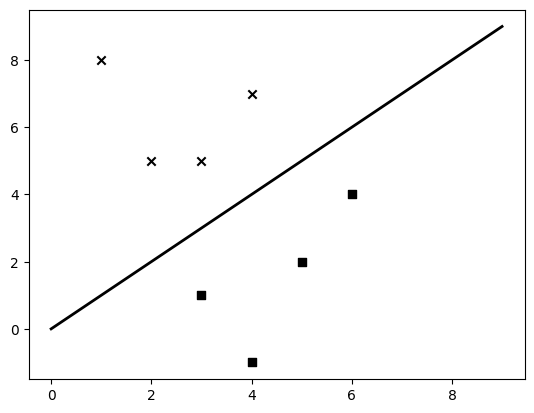

In [ ]:
line_x = range(10)
line_y = line_x

plt.figure()
plt.scatter(class_0[:,0], class_0[:,1], color = 'black', marker = 's')
plt.scatter(class_1[:,0], class_1[:,1], color = 'black', marker = 'x')
plt.plot(line_x, line_y, color = 'black', linewidth = 2)

#Building a Logistic Regression Classifier

**Logistic Regression: A Probabilistic Classifier**

Unlike linear regression which predicts continuous values, logistic regression is used for classification tasks where the outcome is categorical (e.g., yes/no, spam/not spam, cat/dog). It essentially predicts the probability of a data point belonging to a particular class.

**Logistic Regression works by:**

1. Creating a linear equation to represent the relationship between the features and the log-odds of the outcome.
2. Applying the sigmoid function to transform the linear equation's output into a probability.
3. Using the probability to make a classification decision based on a threshold.


***The Sigmoid Function:***


*   At the heart of logistic regression is the sigmoid function. This function takes any input (from negative infinity to positive infinity) and squashes it into an output between 0 and 1. This output represents the probability.
*   The formula for the sigmoid function is: P(x) = 1 / (1 + e^-z)
Where:

    P(x) is the predicted probability.

    e is the mathematical constant (Euler's number).

    z is the linear combination of input features and their weights (similar to linear regression: z = w1*x1 + w2*x2 + ... + b).


***Linear Combination:***

*   Just like linear regression, logistic regression starts by calculating a linear combination of the input features (independent variables) and their weights.
*   This linear combination gives us a score, which is then fed into the sigmoid function.


***Probability Prediction:***

*   The sigmoid function transforms the linear combination score into a probability value between 0 and 1.
*   If the probability is above a certain threshold (usually 0.5), the data point is classified as belonging to the positive class (e.g., spam, cat). If it's below the threshold, it's classified as belonging to the negative class (e.g., not spam, dog).


***Training the Model:***

*   The model is trained using a dataset with known class labels.

*   During training, the algorithm adjusts the weights of the features to minimize the difference between the predicted probabilities and the actual class labels.
*   Common methods for training include maximum likelihood estimation which aims to find the weights that maximize the likelihood of observing the given data.







In [ ]:
from sklearn import linear_model

In [ ]:
X = np.array([[4,7], [3.5,8], [3.1,6.2], [0.5,1], [1,2], [1.2,1.9], [6,2], [5.7,1.5], [5.4, 2.2]])
y = np.array([0,0,0,1,1,1,2,2,2])

There are a number of input parameters for the logistic regression classifier. A couple of important ones are `solver` and `C`

`solver` parameter specifies the type of solver the model will use to solve the system of equations

`C` parameter specifies the regularization strength. Lower value of C indicates higher regularization strength

In [ ]:
classifier = linear_model.LogisticRegression(solver='liblinear', C=100)

classifier.fit(X,y)

LogisticRegression(C=100, solver='liblinear')

`ravel()`: The ravel() function flattens a multi-dimensional array into a 1-dimensional array. So, x_values.ravel() and y_values.ravel() will convert x_values and y_values into 1D arrays.

`np.c_[ ]`: This is NumPy's column stack function. It takes two or more 1D arrays and stacks them horizontally (column-wise) to create a 2D array. In this case, it combines the flattened x_values and y_values to create a 2D array where each row represents a point in the (x, y) feature space.

In [ ]:
def plot_classifier(classifier, X, y):
  x_min = min(X[:,0]) - 1.0
  x_max = max(X[:,0]) + 1.0

  y_min = min(X[:,1]) - 1.0
  y_max = max(X[:,1]) + 1.0

  step_size = 0.01 # defines step size used in mesh grid

  #define the mesh grid
  x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

  #compute the classifier output
  mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

  #reshape the array
  mesh_output = mesh_output.reshape(x_values.shape)


  plt.figure()
  plt.pcolormesh(x_values, y_values, mesh_output, cmap = plt.cm.gray)

  plt.scatter(X[:,0], X[:,1], c=y, s=80, edgecolors = 'black', linewidth = 1, cmap = plt.cm.Paired)

  #specify bouundaries of the figure
  plt.xlim(x_values.min(), x_values.max())
  plt.ylim(y_values.min(), y_values.max())

  #specify ticks on the X and Y axes
  plt.xticks((np.arange(int(min(X[:,0])-1), int(max(X[:,0])+1), 1.0)))
  plt.yticks((np.arange(int(min(X[:,1])-1), int(max(X[:,1])+1), 1.0)))

  plt.show()

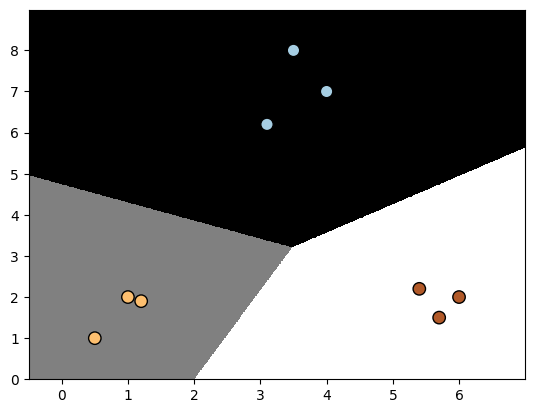

In [ ]:
plot_classifier(classifier, X, y)

#Building a Naive Bayes Classifier

The Naive Bayes classifier is a probabilistic machine learning algorithm based on Bayes' theorem. It's widely used for classification tasks, especially in natural language processing (like spam filtering, sentiment analysis) and text classification.

**"Naive" Assumption:**


*   The "naive" in Naive Bayes comes from the assumption that the features (or attributes) used to describe data points are conditionally independent given the class label.
*   In simpler terms, it assumes that the presence or absence of one feature doesn't affect the presence or absence of other features when predicting the class. This simplifies the calculation.


**How it Works:**

*   Training: During training, the Naive Bayes classifier learns the probabilities of each feature given each class label from the training data. It calculates the prior probabilities of each class and the likelihood of each feature occurring in each class.
*   Prediction: To classify a new data point, the classifier applies Bayes' theorem to calculate the posterior probability of each class given the feature values of the data point. It then assigns the data point to the class with the highest posterior probability.






In [ ]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
#dataset downloaded from https://github.com/PacktPublishing/Python-Machine-Learning-Cookbook/blob/master/Chapter02/data_multivar.txt

input_file = 'data_multivar.txt'

X = []
y = []
with open(input_file, 'r') as f:
  for line in f.readlines():
    data = [float(x) for x in line.split(',')]
    X.append(data[:-1])
    y.append(data[-1])

X = np.array(X)
y = np.array(y)

In [ ]:
classifier_gaussiannb = GaussianNB()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

classifier_gaussiannb.fit(X_train, y_train)
y_pred = classifier_gaussiannb.predict(X_test)

accuracy = 100.0* (y_test == y_pred).sum() / X.shape[0]
print(f"Accuracy of the classifier = {accuracy}%")

Accuracy of the classifier = 24.75%


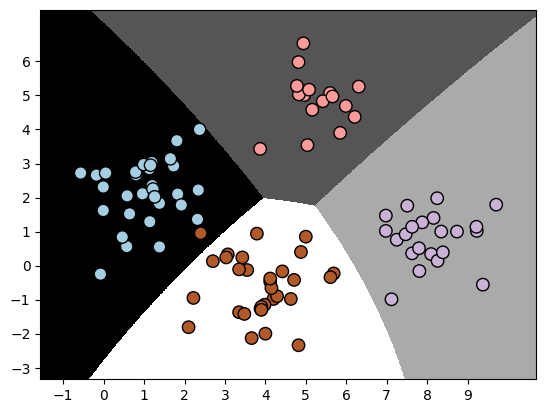

In [ ]:
plot_classifier(classifier_gaussiannb, X_test, y_test)

#Evaluating the accuracy using Cross-Validation

Cross-validation is a technique used to evaluate the performance of a machine learning model and ensure it generalizes well to unseen data. It involves partitioning the dataset into multiple subsets (folds) and using different combinations of these folds for training and testing the model.

Cross-validation addresses overfitting by using multiple train-test splits. It provides a more robust estimate of the model's performance on unseen data.

**How it Works:**


*   Splitting the data: The dataset is divided into 'k' folds (e.g., 5 folds).

*   Training and testing: The model is trained on 'k-1' folds and tested on the remaining fold. This process is repeated 'k' times, with each fold used as the test set once.
*   Evaluation: The performance metrics (e.g., accuracy, precision) are averaged across all 'k' iterations to get a final performance estimate.

**Common Cross-Validation Techniques:**

*   k-fold cross-validation: As described above, the most common type.

*   Stratified k-fold: Ensures that each fold has a similar distribution of class labels (important for imbalanced datasets).
*   Leave-one-out cross-validation: A special case of k-fold where k is equal to the number of data points.

**Benefits:**
*   More reliable performance estimate: Provides a better indication of how the model will perform on unseen data.
*   Hyperparameter tuning: Helps in selecting the best hyperparameters for the model by comparing performance across different parameter settings.
*   Model selection: Assists in choosing the best model among different algorithms.











In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
num_validations = 5
accuracy = cross_val_score(classifier_gaussiannb,X,y,scoring = 'accuracy', cv=num_validations)
print(f"Accuracy = {round(accuracy.mean(), 2)}%")


Accuracy = 0.99%


In [ ]:
f1 = cross_val_score(classifier_gaussiannb, X, y, scoring = 'f1_weighted', cv = num_validations)
print(f"F1 score = {round(f1.mean(),2)}%")

precision = cross_val_score(classifier_gaussiannb,X,y,scoring = 'precision_weighted', cv= num_validations)
print(f"Precision = {round(precision.mean(),2)}%")

recall = cross_val_score(classifier_gaussiannb, X,y,scoring = 'recall_weighted', cv= num_validations)
print(f"Recall = {round(recall.mean(),2)}%")

F1 score = 0.99%
Precision = 1.0%
Recall = 0.99%


#Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. It's a powerful tool for evaluating the performance of a classification model, particularly in cases where there are multiple classes or where the classes are imbalanced.

**Structure:**


*   It's a square matrix where the rows represent the actual (true) classes and the columns represent the predicted classes.
*   Each cell in the matrix represents the number of data points that belong to a specific combination of actual and predicted classes.

**Key Elements:**

*   True Positive (TP): The model correctly predicted the positive class.
*   True Negative (TN): The model correctly predicted the negative class.
*   False Positive (FP): The model incorrectly predicted the positive class (Type I error).
*   False Negative (FN): The model incorrectly predicted the negative class (Type II error).

**Metrics Derived from Confusion Matrix:**
*   Accuracy: (TP + TN) / (TP + TN + FP + FN) - Overall correctness of the model.
*   Precision: TP / (TP + FP) - How many of the predicted positive cases were actually positive.
*   Recall (Sensitivity): TP / (TP + FN) - How many of the actual positive cases were correctly predicted.
*   F1-Score: 2 * (Precision * Recall) / (Precision + Recall) - Harmonic mean of precision and recall.
Specificity: TN / (TN + FP) - How many of the actual negative cases were correctly predicted.














In [ ]:
from sklearn.metrics import confusion_matrix
y_true = [1,0,0,2,1,0,3,3,3]
y_pred = [1,1,0,2,1,0,1,3,3]

confusion_mat = confusion_matrix(y_true,y_pred)

In [ ]:
def plot_confusion_matrix(confusion_mat):
  plt.imshow(confusion_mat, interpolation = 'nearest', cmap = plt.cm.Paired)
  plt.title('Confusion Matrix')
  plt.colorbar()
  tick_marks = np.arange(4)
  plt.xticks(tick_marks, tick_marks)
  plt.yticks(tick_marks, tick_marks)
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

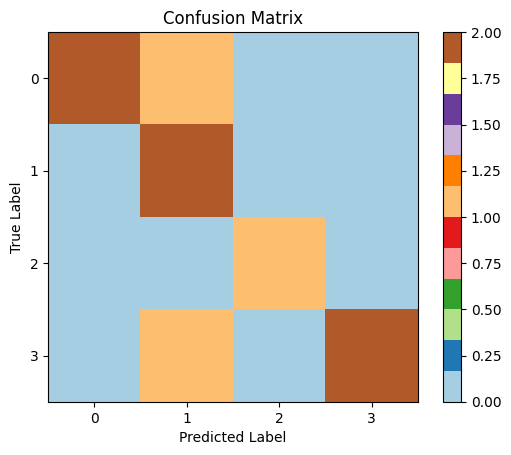

In [ ]:
plot_confusion_matrix(confusion_mat)

#Extracting the Performance Report

In [ ]:
from sklearn.metrics import classification_report

target_names = ['Class-0', 'Class-1', 'Class-2', 'Class-3']
print(classification_report(y_true, y_pred, target_names= target_names))

              precision    recall  f1-score   support

     Class-0       1.00      0.67      0.80         3
     Class-1       0.50      1.00      0.67         2
     Class-2       1.00      1.00      1.00         1
     Class-3       1.00      0.67      0.80         3

    accuracy                           0.78         9
   macro avg       0.88      0.83      0.82         9
weighted avg       0.89      0.78      0.79         9



#**Application 1: Evaluating Cars based on their Characteristics**

In [ ]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#data downloaded from https://archive.ics.uci.edu/dataset/19/car+evaluation

input_file = 'car_data.txt'
X = []
count = 0

with open(input_file, 'r') as f:
  for line in f.readlines():
    data = line[:-1].split(',')
    X.append(data)

X = np.array(X)

**Label Encoding**

In [ ]:
#Convert strings into numerical data

label_encoder = []
X_encoded = np.empty(X.shape)
for i, item in enumerate(X[0]):
  label_encoder.append(preprocessing.LabelEncoder())
  X_encoded[:,i] = label_encoder[-1].fit_transform(X[:,i])

X = X_encoded[:, :-1].astype(int)
y = X_encoded[:, -1].astype(int)

**Training the Classifier**

In [ ]:
classifier = RandomForestClassifier(n_estimators=200, max_depth = 8, random_state = 7)
classifier.fit(X, y)

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=7)

**Cross Validation**

In [ ]:
accuracy = cross_val_score(classifier, X, y, scoring = 'accuracy', cv = 3)
print(f"Accuracy = {round(100*accuracy.mean(),2)}%")

Accuracy = 77.66%


In [ ]:
#Testing encoding on single data instance

input_data = ['vhigh', 'vhigh', '2', '2', 'small', 'low']
input_data_encoded = [-1]*len(input_data)
for i, item in enumerate(input_data):
  input_data_encoded[i] = int(label_encoder[i].transform([input_data[i]]))

input_data_encoded = np.array(input_data_encoded).reshape(1, -1)

<ipython-input-50-5f84135329d0>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  input_data_encoded[i] = int(label_encoder[i].transform([input_data[i]]))
<ipython-input-50-5f84135329d0>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  input_data_encoded[i] = int(label_encoder[i].transform([input_data[i]]))
<ipython-input-50-5f84135329d0>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  input_data_encoded[i] = int(label_encoder[i].transform([input_data[i]]))
<ipytho

In [ ]:
output_class = classifier.predict(input_data_encoded)
print(f"Output Class = {label_encoder[-1].inverse_transform(output_class)[0]}")

Output Class = unacc


**Extracting Validation Curves**

In [ ]:
from sklearn.model_selection import validation_curve

classifier = RandomForestClassifier(max_depth=4, random_state = 7)
parameter_grid = np.linspace(25, 200, 8).astype(int)
train_scores, validation_scores = validation_curve(classifier, X, y, param_name = "n_estimators", param_range = parameter_grid, cv = 5)

print("Validation Curves")
print(f"Param: n_estimators\nTraining scores:\n{train_scores}")
print(f"Param: n_estimators\nValidation scores:\n{validation_scores}")

Validation Curves
Param: n_estimators
Training scores:
[[0.80680174 0.80824891 0.80752533 0.80694143 0.81055676]
 [0.79522431 0.80535456 0.81041968 0.80911063 0.81055676]
 [0.80101302 0.80680174 0.81114327 0.81127983 0.81561822]
 [0.8024602  0.80535456 0.81186686 0.80911063 0.8076645 ]
 [0.80028944 0.80463097 0.81114327 0.8076645  0.81272596]
 [0.80390738 0.80535456 0.81041968 0.81127983 0.81706435]
 [0.80390738 0.80463097 0.81114327 0.81344902 0.81778742]
 [0.80390738 0.80607815 0.81114327 0.81344902 0.81778742]]
Param: n_estimators
Validation scores:
[[0.71098266 0.76589595 0.72543353 0.76811594 0.73333333]
 [0.71098266 0.75433526 0.71965318 0.77101449 0.73333333]
 [0.71098266 0.72254335 0.71965318 0.76521739 0.73623188]
 [0.71098266 0.71387283 0.71965318 0.75942029 0.72753623]
 [0.71098266 0.74277457 0.71965318 0.75942029 0.74202899]
 [0.71098266 0.74277457 0.71965318 0.75942029 0.74782609]
 [0.71098266 0.74566474 0.71965318 0.75942029 0.74492754]
 [0.71098266 0.75144509 0.71965318 

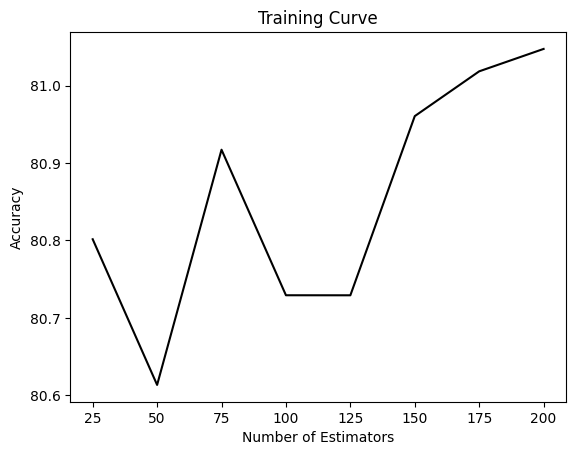

In [ ]:
plt.figure()
plt.plot(parameter_grid, 100*np.average(train_scores,axis=1),color = 'black')
plt.title('Training Curve')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.show()

Validation Curves
Param: max_depth
Training scores:
[[0.71852388 0.70043415 0.70043415 0.69992769 0.69992769]
 [0.80607815 0.80535456 0.80752533 0.80043384 0.80694143]
 [0.90665702 0.91027496 0.92836469 0.89949385 0.90310918]
 [0.97467438 0.96743849 0.96888567 0.97541576 0.96601591]
 [0.99421129 0.99710564 0.99782923 1.         0.99349241]]
Param: max_depth
Validation scores:
[[0.69942197 0.69942197 0.69942197 0.70144928 0.70144928]
 [0.71098266 0.76589595 0.72543353 0.75942029 0.73333333]
 [0.71387283 0.76300578 0.7283237  0.82898551 0.83768116]
 [0.67630058 0.78612717 0.78034682 0.79710145 0.88695652]
 [0.6416185  0.76878613 0.75722543 0.80869565 0.87536232]]


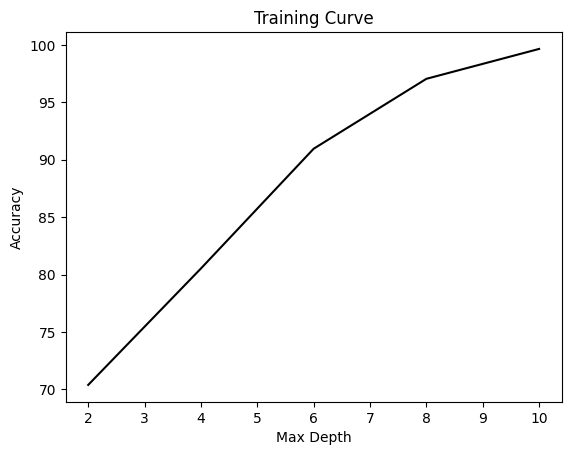

In [ ]:
classifier = RandomForestClassifier(n_estimators=20, random_state = 7)
parameter_grid = np.linspace(2, 10, 5).astype(int)
train_scores, validation_scores = validation_curve(classifier, X, y, param_name = "max_depth", param_range = parameter_grid, cv = 5)

print("Validation Curves")
print(f"Param: max_depth\nTraining scores:\n{train_scores}")
print(f"Param: max_depth\nValidation scores:\n{validation_scores}")


plt.figure()
plt.plot(parameter_grid, 100*np.average(train_scores,axis=1),color = 'black')
plt.title('Training Curve')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()


**Extracting Learning Currves**

In [ ]:
from sklearn.model_selection import learning_curve

classifier = RandomForestClassifier(random_state = 7)

parameter_grid = np.array([200, 500, 800, 1100])
train_sizes, train_scores, validation_scores = learning_curve(classifier, X, y, train_sizes = parameter_grid, cv = 5)

print("Learning Curves")
print(f"Param: n_estimators\nTraining scores:\n{train_scores}")
print(f"Param: n_estimators\nValidation scores:\n{validation_scores}")

Learning Curves
Param: n_estimators
Training scores:
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
Param: n_estimators
Validation scores:
[[0.69942197 0.69942197 0.69942197 0.70144928 0.70144928]
 [0.71387283 0.76878613 0.77456647 0.76811594 0.70144928]
 [0.6734104  0.78612717 0.63583815 0.76811594 0.76811594]
 [0.71387283 0.75433526 0.78901734 0.75942029 0.76811594]]


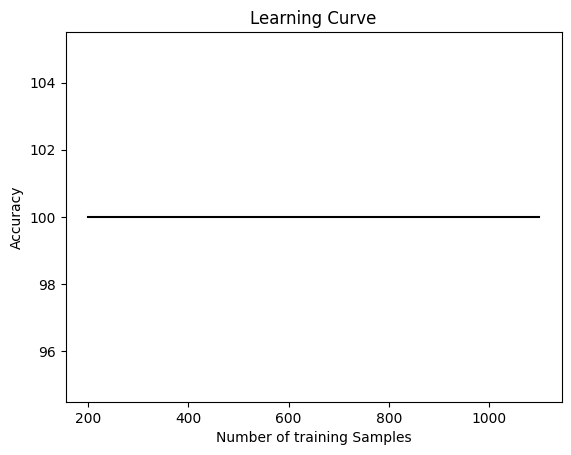

In [ ]:
plt.figure()
plt.plot(parameter_grid, 100*np.average(train_scores, axis = 1), color = 'black')
plt.title('Learning Curve')
plt.xlabel('Number of training Samples')
plt.ylabel('Accuracy')
plt.show()

#**Application 2: Estimating the Income Bracket**

In [5]:
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
import numpy as np


In [31]:
input_file = 'adult_data.txt'
X = []
y = []
count_lessthan50k = 0
count_morethan50k = 0
num_images_threshold = 10000

The goal is to predict if an individual makes less than or more than 50k. We train the model with equal number of data points on each class to avoid class imbalance. We will use 20,000 datapoints from the dataset - 10,000 for each class

In [32]:
with open(input_file, 'r') as f:
  for line in f.readlines():
    if '?' in line:
      continue
    data = line.split(',')

    if data[-1].strip() == '<=50K' and count_lessthan50k<num_images_threshold:
      X.append(data)
      count_lessthan50k += 1
    elif data[-1].strip() == '>50K' and count_morethan50k<num_images_threshold:
      X.append(data)
      count_morethan50k += 1
    if count_lessthan50k >= num_images_threshold and count_morethan50k >= num_images_threshold:
      break

X = np.array(X)

In [33]:
#Convert string data to numerical data
label_encoder = []
X_encoded = np.empty(X.shape)
for i, item in enumerate(X[0]):
  if item.isdigit():
    X_encoded[:,i] = X[:, i]
  else:
    label_encoder.append(preprocessing.LabelEncoder())
    X_encoded[:,i] = label_encoder[-1].fit_transform(X[:,i])

X = X_encoded[:,:-1].astype(int)
y = X_encoded[:,-1].astype(int)


In [34]:
classifier_gaussiannb = GaussianNB()
classifier_gaussiannb.fit(X,y)

GaussianNB()

In [37]:
#Cross Validation

from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)

classifier_gaussiannb.fit(X_train, y_train)
y_test_pred = classifier_gaussiannb.predict(X_test)


In [38]:
f1 = cross_val_score(classifier_gaussiannb, X, y, scoring = 'f1_weighted', cv=5)
print("F1 Score = ", round(f1.mean(),2), "%")

F1 Score =  0.75 %
